In [10]:
#IPL Score Prediction
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df=pd.read_csv('ipl.csv')
remove_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels = remove_columns, axis = 1, inplace = True)
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
76009,2017-05-21,Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,2017-05-21,Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,2017-05-21,Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,2017-05-21,Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


In [15]:
df = df[["date", "bat_team", "bowl_team", "runs", "wickets", "overs", "runs_last_5", "wickets_last_5", "total"]]
bat_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [76]:
df = df[(df['bowl_team'].isin(bat_team))]
Xdf = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Sunrisers Hyderabad']


In [64]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [66]:
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(59197, 28) (59197,)
(5455, 28) (5455,)


In [94]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(X_train , y_train)

LinearRegression()

In [97]:
prediction = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


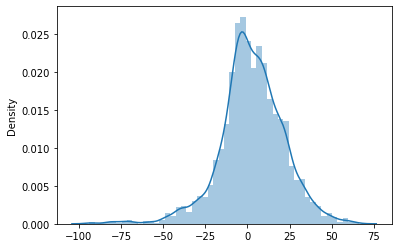

In [98]:
sns.distplot(y_test-prediction)

In [100]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test , prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  14.40996859419302
MSE:  371.4769230535666
RMSE:  19.273736613681496


In [ ]:
import pickle
file_name = 'ipl_score_predict_model.pkl'
pickle.dump(reg , open(file_name,'wb'))